# Системы линейных алгебраических уравнений
## Математическая запись
$$
\begin{bmatrix}
    a_{11} & a_{12} & \ldots & a_{1n}\\
    \vdots & \vdots & \ldots & \vdots\\
    a_{m1} & a_{m2} & \ldots & a_{mn}\\
\end{bmatrix}
\begin{bmatrix}
    x_1\\
    \vdots\\
    x_n\\
\end{bmatrix}
=
\begin{bmatrix}
    b_1\\
    \vdots\\
    b_m\\
\end{bmatrix}
$$

Или же иначе
$$
{\bf Ax = b}
$$

- если уравнений больше чем неизвестных -- переопределенная система
- иначе недоопределенная

### Когда вообще будет существовать решение?
- Квадратная: ${\rm det} A \neq 0$ или, что эквивалентно полноранговости
- Общего вида: Кронекер-Капелли

### Размер СЛАУ $n$, $A \in \mathbb{R}^{n\times n}$
- $\leq 10^4$ вся матрица помещается в память
- $10^4 - 10^6$ только разреженные матрицы или параллельные вычисления
- $\geq 10^6$ параллельные вычисления уже в разреженных матрицах

В следующем семестр вы познакомитесь с численным решением уравнений математрической физики, в реальных задачах такого рода размерность составляет $\geq 10^5$. (Представьте трехмерную сетку в 100 точек, сколько будет неизвестных? А размер матрицы?)

Если мы априорно знаем, что матрица имеет некоторую структуру, то можно сократить память для её хранения, например, ленточные матрицы (тоже очень нужны будут для численных урматов)

## Вопросы к решению СЛАУ
- Какова сложность решения?
- Что происходит из-за плавающей точки?

# Решение СЛАУ: алгоритм Гаусса

Все известен из курса линейной алгебры, выполняется в 2 шага: обнуляем под диагонялью, обнуляем над.

- Что если на $a_{ii} = 0$ для некотрого $i$?

Выбираем другой ведущий элемент отличный от 0.

Сложность? $O(n^3)$

# Решение СЛАУ: LU-разложение

На самом деле, решая систему методом Гаусса, мы получаем LU-разложение матрицы системы.

$$A = LU$$

$L$ -- нижне треугольная матрица, диагоняль единичная, $U$ -- верхне треугольная, $u_{ii} = a_{ii}$. Разложение не единственно, поэтому мы задаем вид диагоняли у матрицы $L$ или $U$.

$$x = A^{-1}b = (LU)^{-1}b = U^{-1}L^{-1}b$$

За сколько можно решить СЛАУ, если известно LU-разложение? $O(n^2)$

# Существование LU-разложения

- Мы не должны делить на 0 в алгортме Гаусса
- Строго невыродненная: все главные миноры невыродненные (HW)

Для эрмитовых положительно определенных матриц модем мы получим разложение Холецкого.

# Существование LU-разложения
$\varepsilon$ маленькое число
$$
A = 
\begin{bmatrix}
\varepsilon & 1\\
1 & 1
\end{bmatrix}
$$

Вот она плавающая точка! Давайте покажем это на доске.

In [1]:
import numpy as np
eps = 1e-18#1.12e-16
a = [[eps, 1],[1.0,  1]]
a = np.array(a)
a0 = a.copy()
n = a.shape[0]
L = np.zeros((n, n))
U = np.zeros((n, n))
for k in range(n): #Eliminate one row   
    L[k, k] = 1
    for i in range(k+1, n):
        L[i, k] = a[i, k] / a[k, k]
        for j in range(k+1, n):
            a[i, j] = a[i, j] - L[i, k] * a[k, j]
    for j in range(k, n):
        U[k, j] = a[k, j]

print('L * U - A:\n', np.dot(L, U) - a0)
L

L * U - A:
 [[ 0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16 -1.00000000e+00]]


array([[1.e+00, 0.e+00],
       [1.e+18, 1.e+00]])

# Выбор ведущего элемента (пивотинг)

Можно стабилизировать переставляя строки или стобцы так, чтобы всегда делить на максимальный элемент. Это эквивалентно следующему:
$$A = PLU$$
$P$ -- матрица перестановок. Это помогает уйти от проблемы из-за плабавющей точки, но не всегда.

# Ошика при решении СЛАУ

Фундаментальная проблема: что будет есть правая часть и/или матрицы будут немного отличаться от исходных? Как это повлияет на разницу решений?

$$(A + \delta A)x =  b + \delta b$$
$$Ax^* = b$$
\begin{align}
    x - x^*
    &= (A + \delta A)^{-1}(b + \delta b) - A^{-1}b\\
    &= \left((A + \delta A)^{-1} - A^{-1}\right)b + (A + \delta A)^{-1}\delta b\\
\end{align}

В общем случае для матого возмущения $E$: $\|A^{-1}E\| < 1$ следующее обращение предствимо в виде ряда Неймана:
$$(A + E)^{-1} = \sum_{k = 0}^{\infty}(-1)^kA^{-k}E^kA^{-1}$$
и 
$$\frac{\|(A + E)^{-1} - A^{-1}\|}{\|A^{-1}\|} \leq \frac{\|A^{-1}\|\|E\|\|I\|}{1 - \|A^{-1}E\|}$$

Тогда

$$ x - x^*
    = \left[\sum_{k = 0}^{\infty}(-1)^kA^{-k}\delta A^k\right]A^{-1}b + \left[\sum_{k = 0}^{\infty}A^{-k}\delta A^k\right]A^{-1}\delta b
$$

\begin{align}
    \frac{\|x - x^*\|}{\|x^*\|} 
    &\leq \frac{\|A^{-1}\|\|A\|}{1 - \|A^{-1}\delta A\|}\left(\frac{\|\delta A\|}{\|A\|} + \frac{\|\delta b\|}{\|b\|}\right)\\
    &\leq \frac{\|A^{-1}\|\| A\|}{1 - \|A^{-1}\|\|\delta A\|\frac{\|A\|}{\|A\|}}\left(\frac{\|\delta A\|}{\|A\|} + \frac{\|\delta b\|}{\|b\|}\right)
\end{align}

Числом обусловленности называется ${\rm cond}(A) = \|A\|\|A^{-1}\|$

Если $\delta A = O$, то $\frac{\|x - x^*\|}{\|x^*\|} \leq {\rm cond}(A)\frac{\|\delta b\|}{\|b\|}$

Во второй норме ${\rm cond}_2(A) = \frac{\sigma_{\max}}{\sigma_{\min}}$, отношение максимального сингулярного числа к минимальному.

Если число обусловленности велико, то ошибки плавающей точки будут сильно влиять на относительную погрешность решения.

Error: 8.968648465804307 Condition number: 6.382514096349867e+19


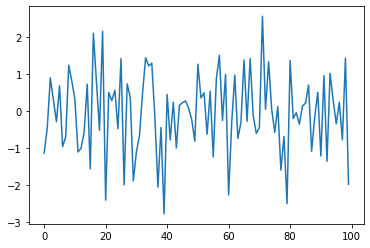

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.random.randn(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a)
print('Error:', er, 'Condition number:', cn)

u, s, v = np.linalg.svd(a)
rhs = np.random.randn(n)
plt.plot(u.T.dot(rhs))

# Переопределенные системы, МНК

Вы уже научились минимизировать, но как найти решение переопределенной системы?

Его не существует в общем случает, но мы можем найти решение, которое дает минимальную ошибку, то есть минимизируя остаток $Ax - b$
$$\|Ax - b\|_2 \to \min_x$$
$$\nabla f = A^*(Ax - b) = 0$$
$$A^*Ax = A^*b$$

Какое число обусловленности у матрицы Грамма $A^*A$, если известно сингулятное разложение матрицы $A$?

Квадрат числа обусловленности матрицы $A$.

То есть решение будет очень неустойчивым, что происходит на практике ?

Используется QR-разложение (произведение ортогональной на верхнетреугольную, существует всегда).

$$A = QR$$
$$x = (A^*A)^{-1}Ab = (R^*Q^*QR)^{-1}R^*Q^*b = R^{-1}Q^*b$$

Обращать верхнетреугольную очень просто за квадрат, более того такое решение более стабильное.

# Степенной метод и собственные числа

Где еще встречается решение СЛАУ?

Собственное разложение.

Всегда ли нужно знать полное разложение или может для каких-то задачь достаточно найти только несколько первых собственных чисел по возрастанию или убыванию ?

Например для задачи разбиения графа или кластеризации.

Задача нахождения собственных чисел:
$$Ax = \lambda x,~~\|x\| = 1$$

Что если мы построим итерационный процесс следующим образом:

$$x_{k + 1} = Ax_{k}$$
$$x_{k + 1} = \frac{x_{k + 1}}{\|x_{k + 1}\|}$$

Такой процесс сойдется к вектору, соответствующему максимальному собственному числу. Соответственно для собственного числа:

$$\lambda_{k + 1} = (Ax_{k + 1}, x_{k + 1})$$
тут скобки обозначают скалярное произведение, это не нужно для итерации по собственному вектору, но необходимо для анализа сходимости такого метода.

Известно, что для эрмитовой матрица он сходится со скоростью $q = \frac{|\lambda_2|}{|\lambda_1|}$, и, как следствие сходимость может быть медленной. Решение принадлежит пространству Крылова, очень важно в методах решения СЛАУ.

Отношение Релея
$$R_A(x) = \frac{(Ax, x)}{(x, x)}$$

А -- эрмитова, соответственно чтобы найти минимальное или максимальное собственное число соответствующей матрицы, необходмо минимизировать или максимизировать отноше